In [166]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML



In [167]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [168]:
features = pd.DataFrame(boston.data, columns = boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [169]:
features["AGE"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [170]:
target = pd.DataFrame(boston.target, columns=["target"])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [171]:
max(target['target'])
min(target['target'])

5.0

In [172]:
df = pd.concat([features, target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [173]:
df.describe().round(decimals = 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


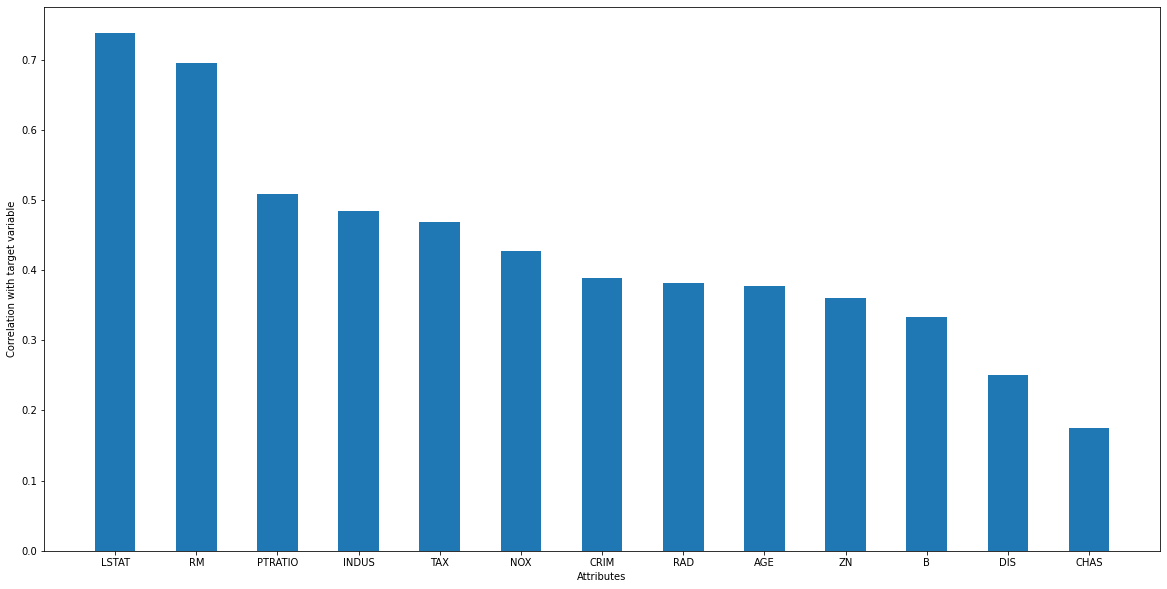

In [174]:
corr = df.corr('pearson')
corrs = [abs(corr[attr]['target']) for attr in list(features)]
l = list(zip(corrs, list(features) ))
l.sort(key = lambda x : x[0], reverse=True)
corrs, labels = list(zip((*l)))
index = np.arange(len(labels))
plt.figure(figsize=(20,10))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variable')
plt.xticks(index, labels)
plt.show()

In [175]:
x = df['LSTAT'].values
y = df['target'].values

In [176]:
print(y[:5])

[24.  21.6 34.7 33.4 36.2]


In [177]:
xs = MinMaxScaler()
x = xs.fit_transform(x.reshape(-1,1))
x = x[:,-1]
ys = MinMaxScaler()
y = ys.fit_transform(y.reshape(-1,1))
y = y[:,-1]

In [178]:
print(y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [179]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2) 

In [180]:
def error(m,x,c,t):
  n = x.size
  e = sum(((m*x+c)-t)**2)
  return e*1/(2*n)

In [181]:
def update(m,x,c,t,learning_rate):
  grad_m = sum(2 *((m*x + c) - t)*x)
  grad_c = sum(2 *((m*x + c) - t))
  m = m - grad_m * learning_rate
  c = c - grad_c * learning_rate
  return m,c

In [182]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
  m = init_m
  c = init_c
  error_values = list()
  mc_values = list()
  for i in range(iterations):
    e = error(m,x,c,t)
    if e < error_threshold:
      print("error less than error threshold, stop gradient descent")
      break
    error_values.append(e)
    m,c = update(m,x,c,t, learning_rate)
    mc_values.append((m,c))
  return m,c,error_values, mc_values

In [183]:
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
m,c,error_values,mc_values = gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate, iterations, error_threshold)

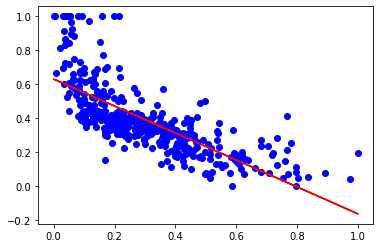

In [184]:
plt.scatter(xtrain,ytrain, color = 'b')
plt.plot(xtrain, (m*xtrain+c), color = 'r')

In [185]:
mc_values_anim = mc_values[0:250:5]

In [186]:
predicted = (m*xtest)+c

In [187]:
mean_squared_error(ytest, predicted)

0.017312061338471678

In [188]:
p = pd.DataFrame(list(zip(xtest,ytest,predicted) ),columns=['x', 'y_target', 'predicted_y'])
p.head()

,x,y_target,predicted_y
0,0.359547,0.335556,0.345014
1,0.323400,0.326667,0.373694
2,0.258554,0.417778,0.425143
3,0.468543,0.220000,0.258535
4,0.219095,0.386667,0.456451


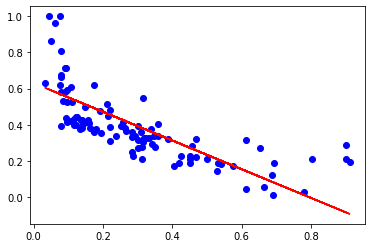

In [189]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted, color = 'r')

In [190]:
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)
x_scaled = xs.inverse_transform(xtest)
y_scaled = ys.inverse_transform(ytest)
predicted_scaled = ys.inverse_transform(predicted)
x_scaled = x_scaled[:, -1]
y_scaled = y_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]
p = pd.DataFrame(list(zip(x_scaled,y_scaled,predicted_scaled)) , columns = ['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,predicted_y
0,14.76,20.1,20.53
1,13.45,19.7,21.82
2,11.10,23.8,24.13
3,18.71,14.9,16.63
4,9.67,22.4,25.54
